### What is it that makes candies so yummy???

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
params={"axes.titlesize":16,
        "axes.titleweight":"bold",
        "axes.titlelocation":"center"}
plt.rcParams.update(params)

A survey was conducted in October of 2017 to determine the preferred candy of choice (based on their *winpercent*). Characteristics of the candies were also recorded, which include:
* whether the candy was/contained (0 for no, 1 for yes):
        chocolate
        fruity
        caramel
        peanutyalmondy - including peanuts, peanut butter or almonds
        nougat
        crispedricewafer - including crisped rice, wafers, or a cookie component
        hard - i.e. a hard or soft candy
        bar - i.e. a bar or a piece
        pluribus - was the candy one of many in a bag/box
* what the percentile the candy came under in terms of:
        sugarpercent
        pricepercent

The results are as follows:

In [2]:
df=pd.read_csv("../input/fivethirtyeight-candy-power-ranking-dataset/candy-data.csv")
df.head()

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   competitorname    85 non-null     object 
 1   chocolate         85 non-null     int64  
 2   fruity            85 non-null     int64  
 3   caramel           85 non-null     int64  
 4   peanutyalmondy    85 non-null     int64  
 5   nougat            85 non-null     int64  
 6   crispedricewafer  85 non-null     int64  
 7   hard              85 non-null     int64  
 8   bar               85 non-null     int64  
 9   pluribus          85 non-null     int64  
 10  sugarpercent      85 non-null     float64
 11  pricepercent      85 non-null     float64
 12  winpercent        85 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
chocolate,85.0,0.435294,0.498738,0.000000,0.000000,0.000000,1.000000,1.00000
fruity,85.0,0.447059,0.500140,0.000000,0.000000,0.000000,1.000000,1.00000
caramel,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
peanutyalmondy,85.0,0.164706,0.373116,0.000000,0.000000,0.000000,0.000000,1.00000
nougat,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
crispedricewafer,85.0,0.082353,0.276533,0.000000,0.000000,0.000000,0.000000,1.00000
hard,85.0,0.176471,0.383482,0.000000,0.000000,0.000000,0.000000,1.00000
bar,85.0,0.247059,0.433861,0.000000,0.000000,0.000000,0.000000,1.00000
pluribus,85.0,0.517647,0.502654,0.000000,0.000000,1.000000,1.000000,1.00000
sugarpercent,85.0,0.478647,0.282778,0.011000,0.220000,0.465000,0.732000,0.98800


In [5]:
df.isnull().sum()

competitorname      0
chocolate           0
fruity              0
caramel             0
peanutyalmondy      0
nougat              0
crispedricewafer    0
hard                0
bar                 0
pluribus            0
sugarpercent        0
pricepercent        0
winpercent          0
dtype: int64

The data looks good (appropriate dtype, basic statistics makes sense, no null values)! So let's begin some exploratory data analysis!

Text(0.5, 1.0, 'Candy Ranking')

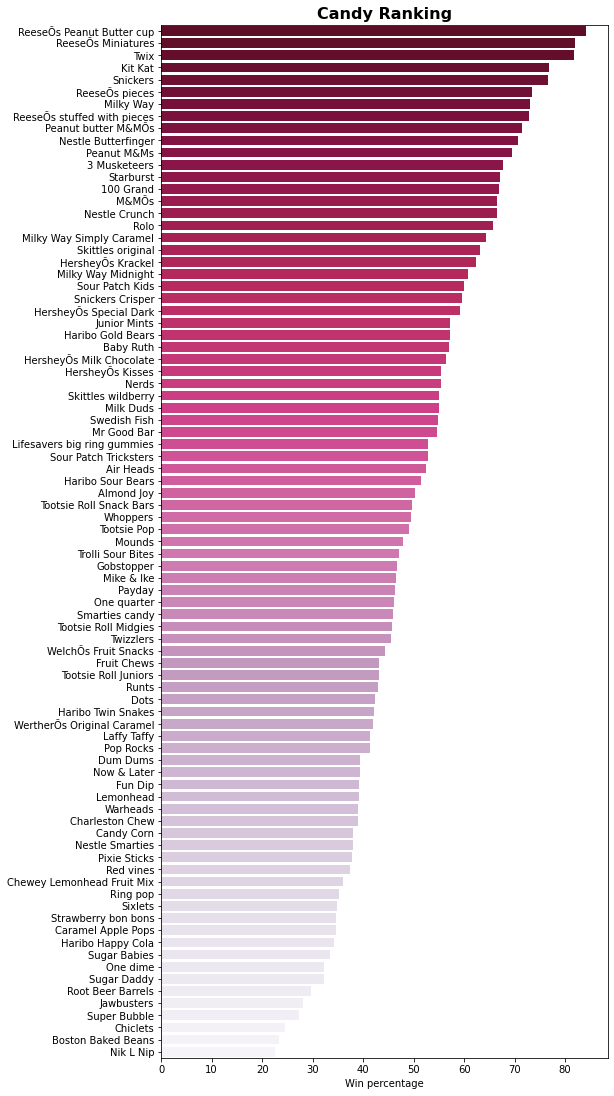

In [6]:
plt.figure(figsize=(8,19))
sns.barplot(x=df["winpercent"],y=df["competitorname"],order=df[["competitorname","winpercent"]].sort_values(by="winpercent",ascending=False).iloc[:,0],palette="PuRd_r")
plt.xlabel("Win percentage")
plt.ylabel("")
plt.title("Candy Ranking")

There are no absolute winners or losers in the 85 different types of candies, but there candies that win more than 80% of the time are Reese's Peanut Butter cup, Reese's Miniatures and Twix while the least favourite candies are Nik L Nip, Boston Baked Beans and Chiclets.

Where does your favourite candy rank?

Text(0.5, 1.0, 'Candy characteristics correlation')

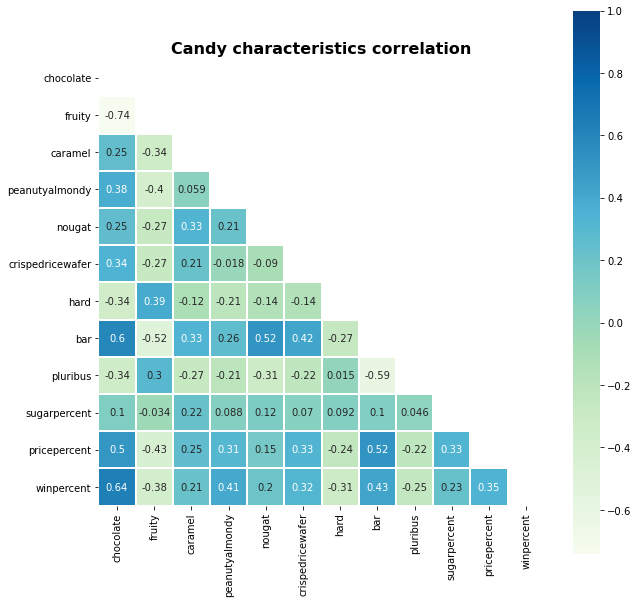

In [7]:
plt.figure(figsize=(10,10))
mask=np.zeros_like(df.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(data=df.corr(),annot=True,square=True,mask=mask,cmap="GnBu",linewidths=1,linecolor="white")
plt.title("Candy characteristics correlation")

* Having chocolate in the candy would give a high win percentage, followed by being a bar candy and having peanuts/peanut butter/almonds
* Chocolate or nougat in the candy would usually come in the form of a bar as opposed to pluribus candies
* Chocolate or a bar candy would also be a more expensive candy, while fruity candies would be less expensive
* Fruity candies, as compared to the others, are more likely to be a hard candy
* Chocolate are not usually found in fruity candies

In [8]:
def grapher(colm,titled,labe,colr):
    fig,axes=plt.subplots(1,2,figsize=(10,4))
    df[colm].value_counts().plot(kind="pie",autopct="%1.1f%%",startangle=90,colors=colr,labels=labe,explode=[0,0.05],ax=axes[0])
    sns.swarmplot(x=df[colm],y=df["winpercent"],palette=colr,ax=axes[1])
    axes[0].set_xlabel("")
    axes[1].set_xlabel("")
    axes[0].set_ylabel("")
    axes[1].set_ylabel("Win percentage")
    axes[1].set_xticklabels(labe)
    plt.suptitle(titled,fontweight="bold",fontsize=16,y=1.05)
    plt.tight_layout()
    plt.show()

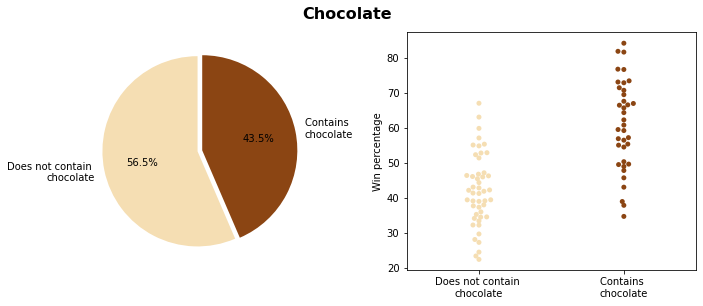

In [9]:
grapher("chocolate","Chocolate",["Does not contain \nchocolate","Contains \nchocolate"],["wheat","saddlebrown"])

43% of the candies contain chocolate, and those that do have a higher win percentage.

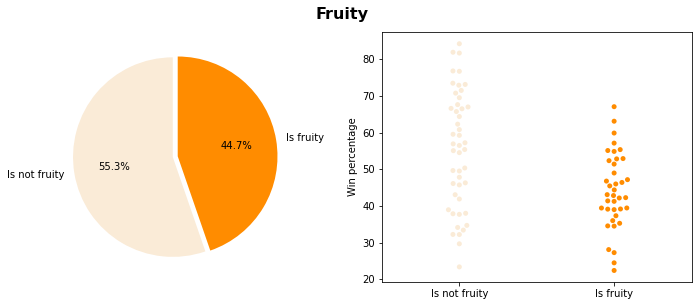

In [10]:
grapher("fruity","Fruity",["Is not fruity","Is fruity"],["antiquewhite","darkorange"])

There are more candies that have a fruity flavour that those that contain chocolate. Unfortunately the fruity flavour does not mean a higher win percentage though.

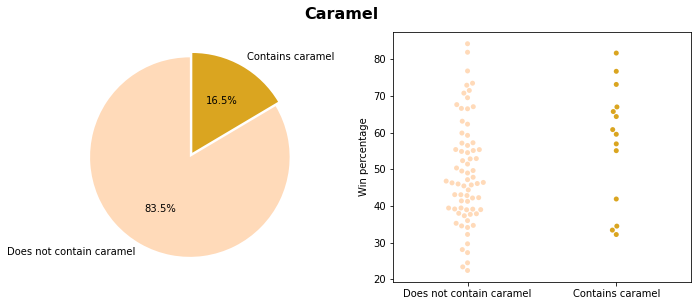

In [11]:
grapher("caramel","Caramel",["Does not contain caramel","Contains caramel"],["peachpuff","goldenrod"])

Caramel can be found in 16% of the 85 candies, and seems to have a slight lean towards a higher win percentage. 

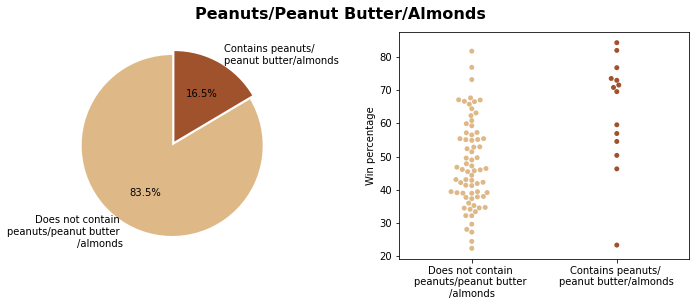

In [12]:
grapher("peanutyalmondy","Peanuts/Peanut Butter/Almonds",["Does not contain \npeanuts/peanut butter \n/almonds","Contains peanuts/ \npeanut butter/almonds"],["burlywood","sienna"])

Again, candies containing peanuts/peanut butter/almonds only account for 16% of the candies, which may be due to the manufacturers accounting for people with nut allergies. Candies without any peanuts/peanut butter/almonds does not an effet on the win percentage, but people seem to have polarising views when peanuts/peanut butter/almonds are present.

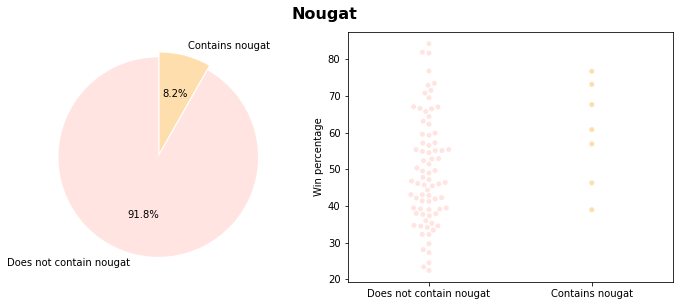

In [13]:
grapher("nougat","Nougat",["Does not contain nougat","Contains nougat"],["mistyrose","navajowhite"])

Candies containing nougat only make up 8% of the candies, and does not have much effect on the win percentage.

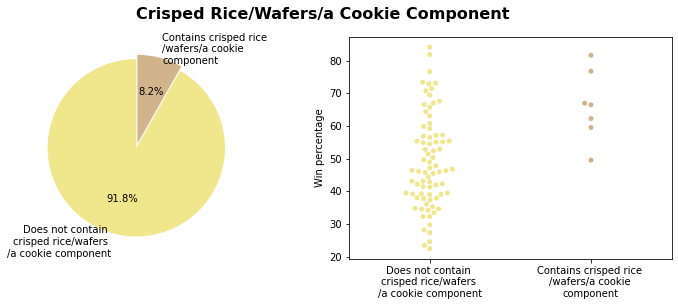

In [14]:
grapher("crispedricewafer","Crisped Rice/Wafers/a Cookie Component",["Does not contain \ncrisped rice/wafers \n/a cookie component","Contains crisped rice \n/wafers/a cookie \ncomponent"],["khaki","tan"])

Similar to nougat, candies with crisped rice/wafers/a cookie component only make up 8% of the candies. A crisped rice/wafers/a cookie component does seems to have a slight effect on the win percentage. 

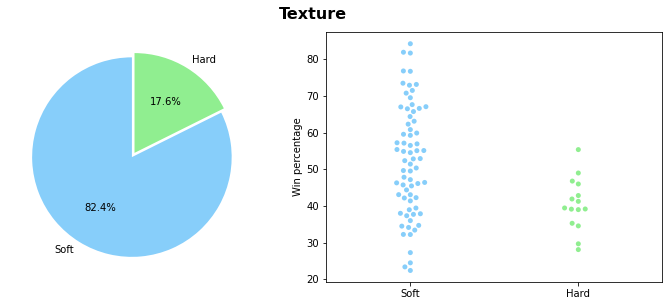

In [15]:
grapher("hard","Texture",["Soft","Hard"],["lightskyblue","lightgreen"])

Hard candies make up 17% of the 85 candies, and actually have a lower win percentage. People seem to be worried about breaking their teeth. On the other hand, soft candies don't necessarily have a higher win percentage, but people don't seem too bothered about the softness.

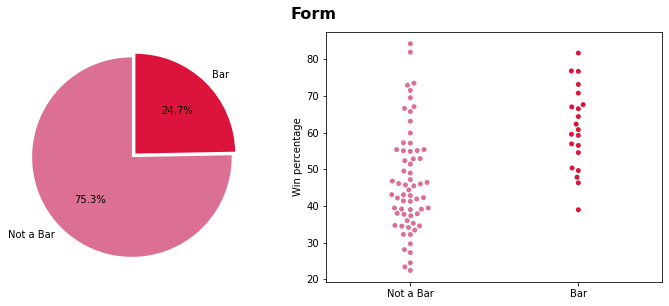

In [16]:
grapher("bar","Form",["Not a Bar","Bar"],["palevioletred","crimson"])

Bar candies make up almost one quarter of the candies, and are generally more favoured over non bar candies.

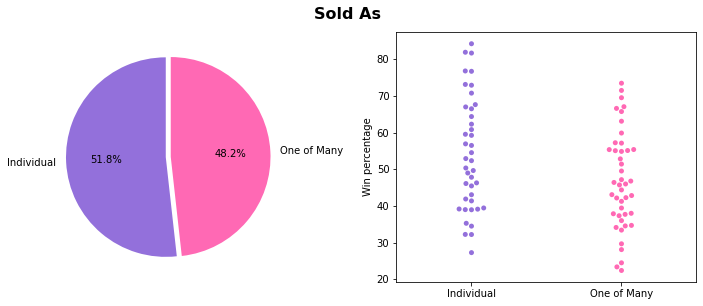

In [17]:
grapher("pluribus","Sold As",["Individual","One of Many"],["mediumpurple","hotpink"])

Almost half-half, but people seem to enjoy individual candies rather that those being one of many in a bag.

In [18]:
def grapher2(coln,colur,titler,labelx,binsize):
    fig=plt.figure(figsize=(6,6))
    ax1=plt.subplot2grid((4,1),(0,0))
    ax2=plt.subplot2grid((4,1),(1,0),rowspan=3)
    sns.distplot(a=df[coln],color=colur,bins=binsize,ax=ax1)
    sns.regplot(x=df[coln],y=df["winpercent"],color=colur,ax=ax2)
    plt.suptitle(titler,fontweight="bold",fontsize=16,y=0.93)
    ax1.set_xlabel("")
    ax1.set_xticklabels([])
    ax1.set_yticklabels([])
    ax2.set_ylim([0,100])
    ax2.set_xlabel(labelx)
    ax2.set_ylabel("Win Percentage")
    plt.show()

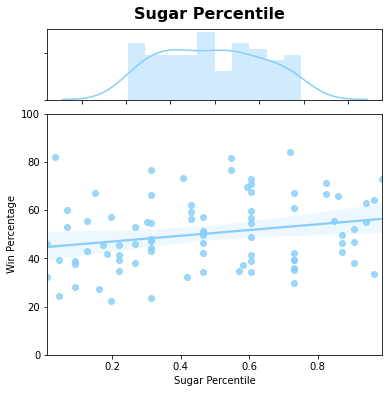

In [19]:
grapher2("sugarpercent","lightskyblue","Sugar Percentile","Sugar Percentile",10)

Sugar equals yummy, but sugar does not equal winning. There is only a slight positive correlation between sugar percentile and the win percentage at 0.23. Seems like people really don't care about sugar, so maybe sugar does not equal yummy..

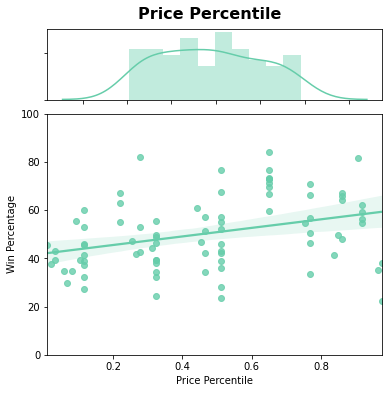

In [20]:
grapher2("pricepercent","mediumaquamarine","Price Percentile","Price Percentile",10)

Price has a slightly more positive correlation with winning (0.35) than sugar does, but there are some more expensive candies that have a win percentage of lower than 40. I guess you don't get what you pay for as people don't care about how much a candy costs as long as it's yummy.

### so, candy anyone?